# Load of the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load of the data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Define of target and text

In [3]:
X = df["text"]
y = df["target"]

Split in train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=0)

Count in train and test

In [5]:
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

Bar plot

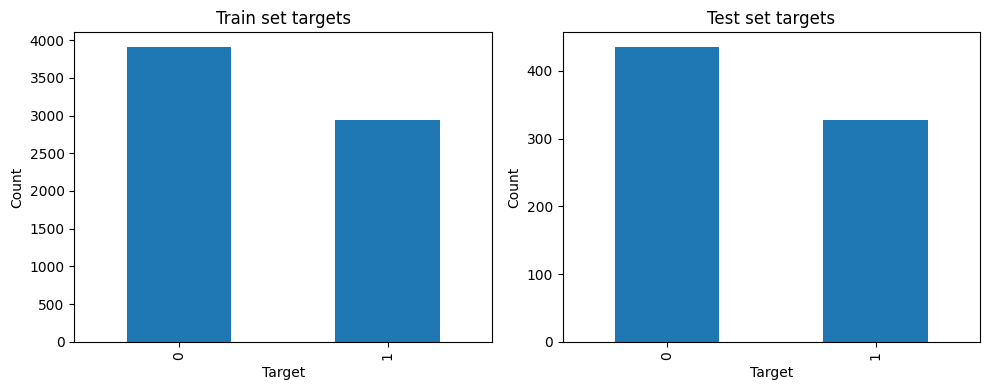

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

train_counts.plot(kind="bar", ax=axes[0], title="Train set targets")
test_counts.plot(kind="bar", ax=axes[1], title="Test set targets")

axes[0].set_xlabel("Target")
axes[0].set_ylabel("Count")

axes[1].set_xlabel("Target")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

The values in the dataset, as shown in the bar chart, are not balanced. This is because there is not an equal number of tweets saying that there is destruction and those saying that there is no destruction.

# Data processing

Dataframes for train and test:

In [7]:
train_df = df.loc[X_train.index].copy()
test_df = df.loc[X_test.index].copy()

Filter out what I don't want

In [8]:
train_df = train_df.drop(columns=["id", "location"])
test_df = test_df.drop(columns=["id", "location"])

Filling all missing values with null

In [9]:
train_df = train_df.fillna("null")
test_df = test_df.fillna("null")

Combination of columns

In [10]:
train_df["inputs"] = train_df["keyword"] + " " + train_df["text"]
test_df["inputs"] = test_df["keyword"] + " " + test_df["text"]

Numpy arrays

In [11]:
import numpy as np

In [12]:
X_train_np = train_df["inputs"].values
y_train_np = train_df["target"].values

In [13]:
X_test_np = test_df["inputs"].values
y_test_np = test_df["target"].values